Original dataset: 9609797 rows
Filtered dataset: 82164 rows
✅ Total complaints after filtering: 82164
📋 Columns: ['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue', 'Consumer complaint narrative', 'Company public response', 'Company', 'State', 'ZIP code', 'Tags', 'Consumer consent provided?', 'Submitted via', 'Date sent to company', 'Company response to consumer', 'Timely response?', 'Consumer disputed?', 'Complaint ID', 'cleaned_narrative']


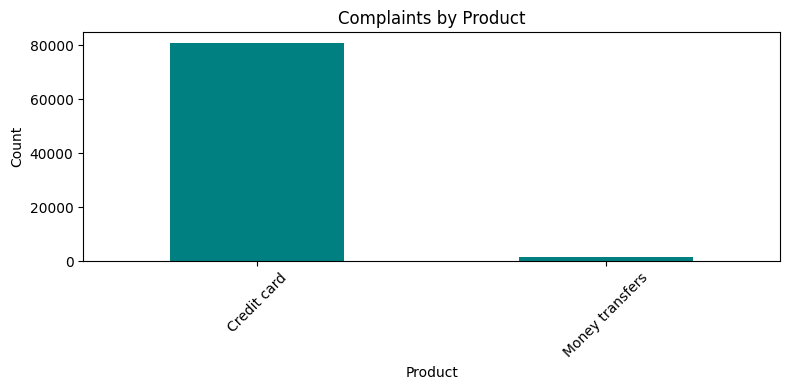

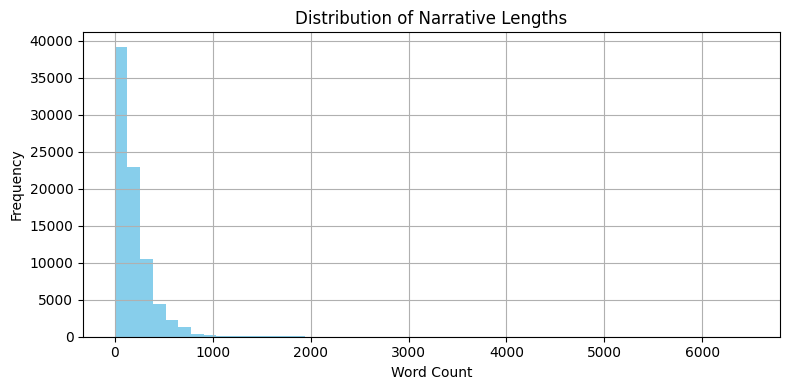

✅ EDA complete. Summary saved to reports/eda_summary.json


In [2]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..", "src")))
import pandas as pd
import matplotlib.pyplot as plt
from data_preprocessing import preprocess_complaints

# --- Run Preprocessing ---
df = preprocess_complaints(
    input_path="../data/raw/complaints.csv",
    output_path="../data/interim/filtered_complaints.csv"
)

# --- Basic Stats ---
print(f"✅ Total complaints after filtering: {len(df)}")
print("📋 Columns:", df.columns.tolist())

# --- Distribution by Product ---
plt.figure(figsize=(8, 4))
df["Product"].value_counts().plot(kind="bar", color="teal")
plt.title("Complaints by Product")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- Narrative Length Distribution ---
df["narrative_length"] = df["cleaned_narrative"].apply(lambda x: len(x.split()))
plt.figure(figsize=(8, 4))
df["narrative_length"].hist(bins=50, color="skyblue")
plt.title("Distribution of Narrative Lengths")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# --- Save Summary Report ---
summary = {
    "total_complaints": len(df),
    "products": df["Product"].value_counts().to_dict(),
    "narrative_length_stats": df["narrative_length"].describe().to_dict()
}

pd.Series(summary).to_json("../reports/eda_summary.json")

print("✅ EDA complete. Summary saved to reports/eda_summary.json")
